In [1]:
#Lab 6: Differentiation and Projectile Motion
#Lab Partners: Ravi Kini (working alone)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#6.1
def right(f, x, h):
    return (f(x + h) - f(x))/h

def f(x): #derivative 0
    return 2
def g(x): #derivative 3
    return 3*x
def h(x): #derivative 4*x
    return 2*x**2

print(right(f,1,0.01))
#should be 0
print(right(g,1,0.01))
#should be 3
print(right(h,1,0.01))
#should be 4*1 = 4

0.0
3.000000000000025
4.020000000000001


In [3]:
#6.2
def center(f,x,h):
    return (f(x + h) - f(x-h))/(2*h)

print(center(f,1,0.01))
#should be 0
print(center(g,1,0.01))
#should be 3
print(center(h,1,0.01))
#should be 4*1 = 4

0.0
3.000000000000025
4.0000000000000036


In [4]:
#6.3
def f(x): # derivative 6*x**2
    return 2*x**3

#should be 6*1**2 = 6
print("right:", right(f,1,0.1), "center:", center(f,1,0.1)) 
print("right:", right(f,1,0.01),  "center:", center(f,1,0.01)) 
print("right:", right(f,1,0.001), "center:", center(f,1,0.001)) 
#truncation error consistent, changes much more quickly for center

right: 6.620000000000008 center: 6.020000000000003
right: 6.060200000000027 center: 6.000200000000011
right: 6.006001999999455 center: 6.000001999999727


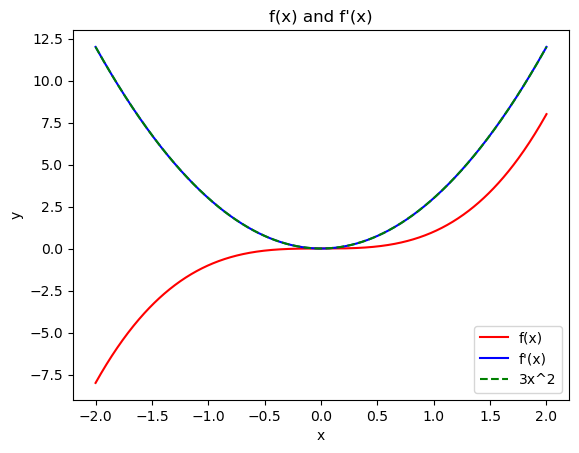

In [5]:
#6.4
def f(x):
    return x**3

UPPER = 2
LOWER = -2
x = np.linspace(LOWER, UPPER, 1000)
plt.plot(x, f(x), "r-", label="f(x)")
plt.plot(x, center(f,x,0.001), "b-", label="f'(x)")
plt.plot(x, 3*x**2, "g--", label="3x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) and f'(x)")
plt.legend()
plt.show()

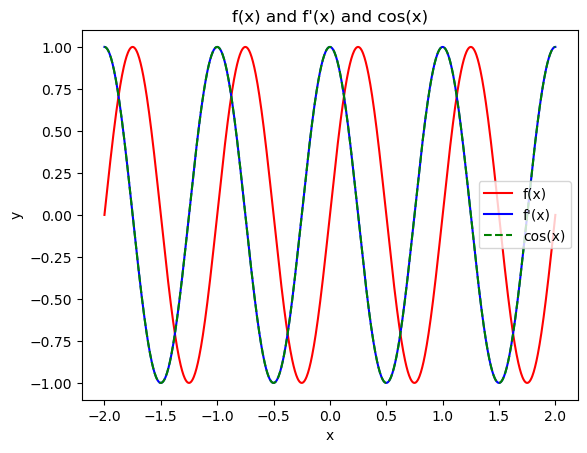

In [6]:
#6.5
def f(x):
    return np.sin(x)

UPPER = 2
LOWER = -2
x = np.linspace(LOWER, UPPER, 1000)
plt.plot(x, f(2*np.pi*x), "r-", label="f(x)")
plt.plot(x, center(f,2*np.pi*x,0.001), "b-", label="f'(x)")
plt.plot(x, np.cos(2*np.pi*x), "g--", label="cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) and f'(x) and cos(x)")
plt.legend()
plt.show()

In [7]:
#6.6
def euler(dt, x, y, vx, vy, ax, ay):
    x = x + dt * vx
    y = y + dt * vy
    vx = vx + dt * ax
    vy = vy + dt * ay
    return x, y, vx, vy
print(np.around(euler(0.134 , 0.659 , 0.282 , 0.662 , 0.643 , 0.900 , 0.451),2))
print(np.around(euler(0.924 , 0.959 , 0.575 , 0.299 , 0.710 , 0.699 , 0.471),2))

[0.75 0.37 0.78 0.7 ]
[1.24 1.23 0.94 1.15]


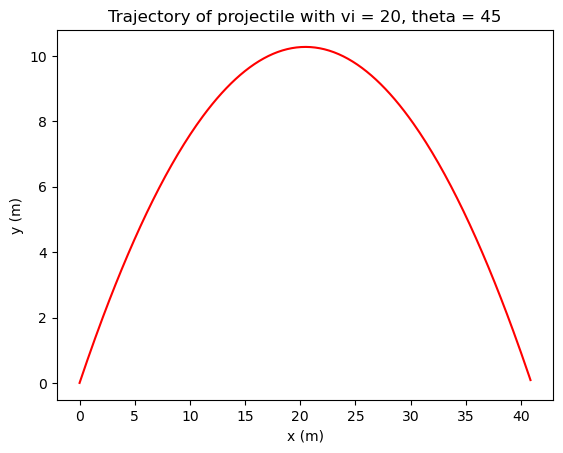

In [8]:
#6.7
tau = 2 * np.pi
vi = 20 # [m/s]
g = 9.8 # [m/s^2]
theta = tau/8
dt = 0.01 # [s]
x = 0 #[m]
y = 0 #[m]
vx = vi*np.cos(theta)
vy = vi*np.sin(theta)

tjx = np.array([])
tjy = np.array([])

while y >= 0:
    tjx = np.append(tjx, x)
    tjy = np.append(tjy, y)
    x, y, vx, vy = euler(dt, x, y, vx, vy, 0, -g)
    #calc next values of x and y

plt.plot(tjx, tjy, "r-")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectory of projectile with vi = 20, theta = 45")
plt.show()    

In [9]:
#6.8
#R = vi^2 * sin(2 * theta) / g
#  = 20^2 * sin(2 * tau/8) / 9.8
#  = 40.816 m
#consistent with plotted result of slightly over 40

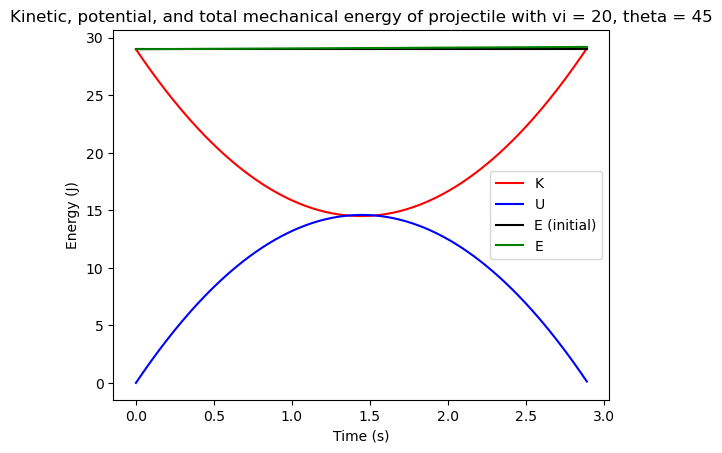

In [10]:
#6.9
tau = 2 * np.pi
vi = 20 # [m/s]
g = 9.8 # [m/s^2]
theta = tau/8
dt = 0.01 # [s]
x = 0 #[m]
y = 0 #[m]
vx = vi*np.cos(theta)
vy = vi*np.sin(theta)
m = 0.145 #[kg]

tjx = np.array([])
tjy = np.array([])
tjvx = np.array([])
tjvy = np.array([])

while y >= 0:
    tjx = np.append(tjx, x)
    tjy = np.append(tjy, y)
    tjvx = np.append(tjvx, vx)
    tjvy = np.append(tjvy, vy)
    x, y, vx, vy = euler(dt, x, y, vx, vy, 0, -g)
    
t = np.arange(tjx.size)*dt
plt.plot(t, 1/2 * m * (tjvx ** 2 + tjvy ** 2), "r-", label="K")
#calc kinetic energy
plt.plot(t, m * g * tjy, "b-", label="U")
#calc potential energy
plt.plot(t, np.full((tjx.size), 1/2 * m * vi ** 2), "k-", label="E (initial)")
#calc total energy (from initial conditions)
plt.plot(t, 1/2 * m * (tjvx ** 2 + tjvy ** 2) + m * g * tjy, "g-", label="E")
#calc total energy (from sum of kinetic and potential)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Kinetic, potential, and total mechanical energy of projectile with vi = 20, theta = 45")
plt.legend()
plt.show()  

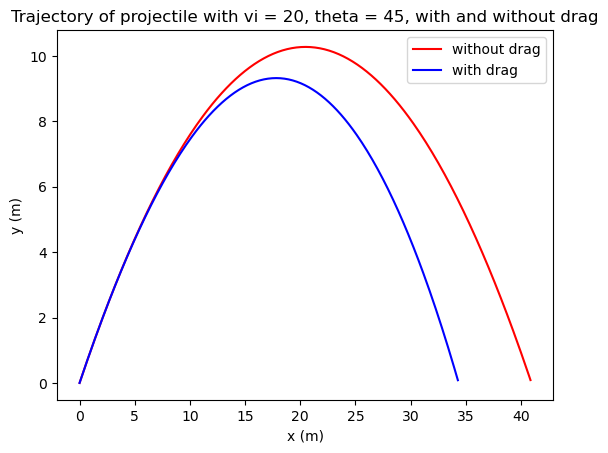

In [11]:
#6.10
tau = 2 * np.pi
vi = 20 # [m/s]
g = 9.8 # [m/s^2]
theta = tau/8
dt = 0.01 # [s]
x = 0 #[m]
y = 0 #[m]
xd = 0 #[m]
yd = 0 #[m]
vx = vi*np.cos(theta)
vy = vi*np.sin(theta)
vxd = vi*np.cos(theta)
vyd = vi*np.sin(theta)
k = 0.00622 #[1/m]

tjx = np.array([])
tjy = np.array([])
#witohut drag
tjxd = np.array([])
tjyd = np.array([])
#with drag

while y >= 0:
    tjx = np.append(tjx, x)
    tjy = np.append(tjy, y)
    x, y, vx, vy = euler(dt, x, y, vx, vy, 0, -g)
while yd >= 0:
    tjxd = np.append(tjxd, xd)
    tjyd = np.append(tjyd, yd)
    axd = -k*np.sqrt(vxd ** 2 + vyd ** 2)*vxd
    ayd = -g + -k*np.sqrt(vxd ** 2 + vyd ** 2)*vyd
    xd, yd, vxd, vyd = euler(dt, xd, yd, vxd, vyd, axd, ayd)
    #drag \vec{a} = -kv\vec{v} = -kv(v_x\hat{i} + v_y\hat{j})
    #ax = -kvv_x, ay = -g + -kvv_y

plt.plot(tjx, tjy, "r-", label="without drag")
plt.plot(tjxd, tjyd, "b-", label="with drag")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectory of projectile with vi = 20, theta = 45, with and without drag")
plt.legend()
plt.show()  

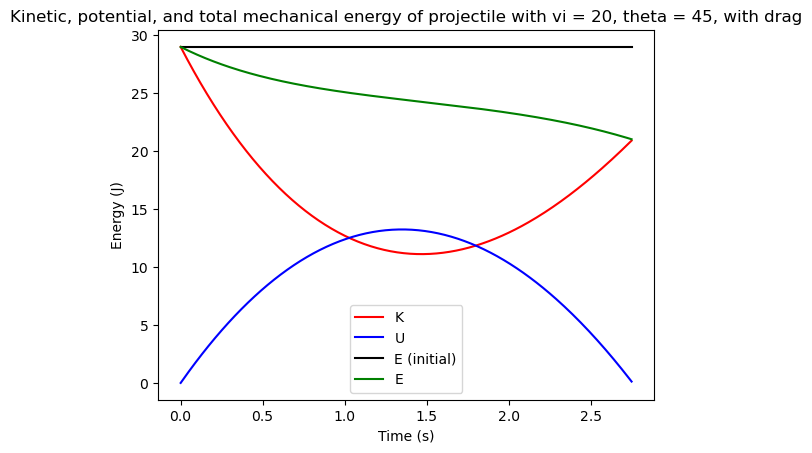

In [12]:
#6.11
tau = 2 * np.pi
vi = 20 # [m/s]
g = 9.8 # [m/s^2]
theta = tau/8
dt = 0.01 # [s]
xd = 0 #[m]
yd = 0 #[m]
vxd = vi*np.cos(theta)
vyd = vi*np.sin(theta)
k = 0.00622 #[1/m]

tjxd = np.array([])
tjyd = np.array([])
tjvxd = np.array([])
tjvyd = np.array([])
#with drag

while yd >= 0:
    tjxd = np.append(tjxd, xd)
    tjyd = np.append(tjyd, yd)
    tjvxd = np.append(tjvxd, vxd)
    tjvyd = np.append(tjvyd, vyd)
    axd = -k*np.sqrt(vxd ** 2 + vyd ** 2)*vxd
    ayd = -g + -k*np.sqrt(vxd ** 2 + vyd ** 2)*vyd
    xd, yd, vxd, vyd = euler(dt, xd, yd, vxd, vyd, axd, ayd)
    #drag \vec{a} = -kv\vec{v} = -kv(v_x\hat{i} + v_y\hat{j})
    #ax = -kvv_x, ay = -g + -kvv_y

t = np.arange(tjxd.size)*dt
plt.plot(t, 1/2 * m * (tjvxd ** 2 + tjvyd ** 2), "r-", label="K")
#calc kinetic energy
plt.plot(t, m * g * tjyd, "b-", label="U")
#calc potential energy
plt.plot(t, np.full((tjxd.size), 1/2 * m * vi ** 2), "k-", label="E (initial)")
#calc total energy (from initial conditions)
plt.plot(t, 1/2 * m * (tjvxd ** 2 + tjvyd ** 2) + m * g * tjyd, "g-", label="E")
#calc total energy (from sum of kinetic and potential)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Kinetic, potential, and total mechanical energy of projectile with vi = 20, theta = 45, with drag")
plt.legend()
plt.show()  
#total mechanical energy is not conserved, as some becomes thermal energy due to drag